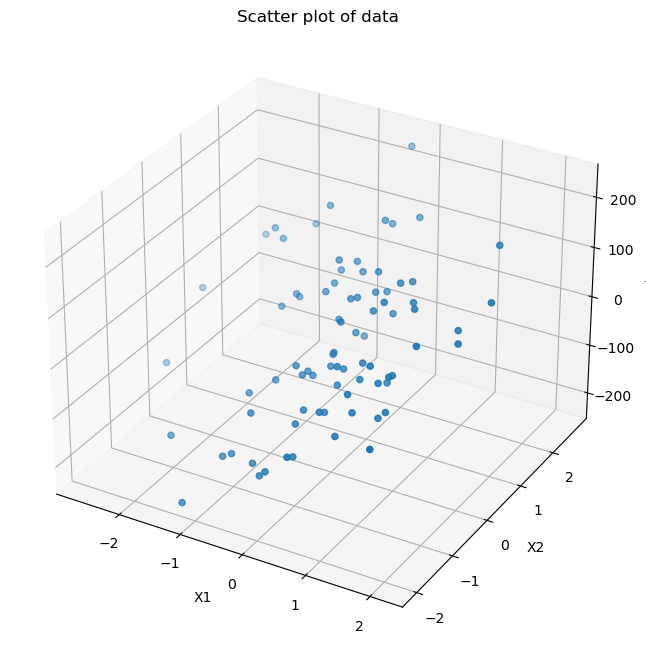

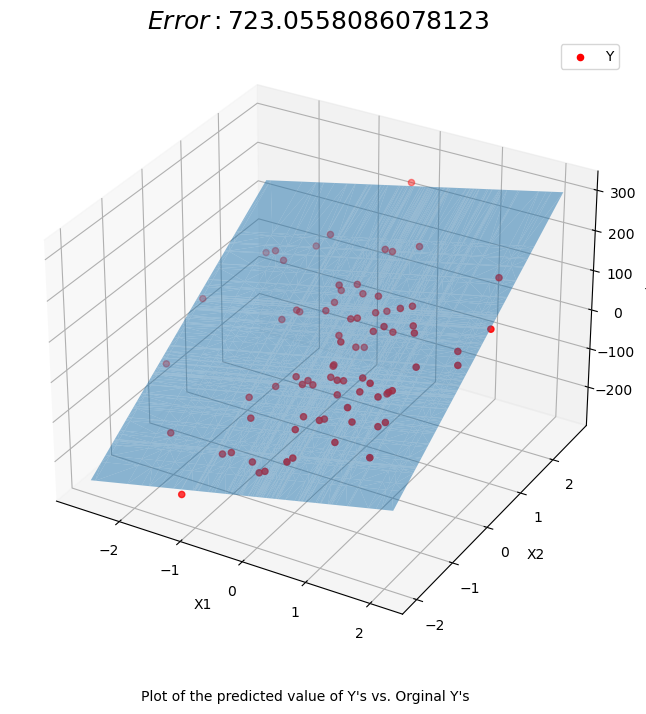

In [5]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline


class LinearRegression(object):
    
    def __init__(self, learning_rate=0.001, n_iters=1000, normal=False):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
        self.normal = normal
        self.costs = []
        
    def fit(self, X, y):
        n_samples, n_features = X.shape
        
        # init parameters
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        if self.normal:
            X_b = np.c_[np.ones((n_samples, 1)), X]
            try:
                # Closed formed solution for linear Regression
                weights_ = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
    
            except Exception as e:
                  # using Moore-Penrose Psuedo inverse when inverse of the matrix is not possible
                  # theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
                weights_ = np.linalg.pinv(X_b).dot(y)
                
            
            tmp = weights_.tolist()
            
            self.bias = tmp.pop(0)
            self.weights = tmp
            
        else:
            # gradient descent

            for _ in range(self.n_iters):
                y_predicted = np.dot(X, self.weights) + self.bias

                cost = np.mean(np.square(y - y_predicted))
                self.costs.append(cost)

                # compute gradients
                dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
                db = (1 / n_samples) * np.sum(y_predicted - y)


                # update parameters
                self.weights -= self.lr * dw
                self.bias -= self.lr * db
        
      # to simplify plotting
        if not self.normal:
            self.weights = self.weights.tolist()
            self.bias = self.bias.tolist()
            
    
    def predict(self, X):
        if self.normal:
            weights_ = [self.bias] + self.weights
            
            X_b = np.c_[np.ones((X.shape[0], 1)), X]
            y_approximated = X_b.dot(weights_)
        else:
            y_approximated = np.dot(X, self.weights) + self.bias
            
        return y_approximated
# metric

def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)
# train-test

X, y = datasets.make_regression(n_samples=400, n_features=2, noise=30, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
def visualize(X, y,predictions, mse, weights, bias):
    
    fig = plt.figure(1, figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X[:, 0], X[:, 1], y)
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_zlabel('Y')
    ax.set_title("Scatter plot of data")
    

    Ws = weights[:]
    Ws.insert(0, bias)

    Ws = np.array(Ws)
    X_b = np.c_[np.ones((X.shape[0], 1)), X]


    # # # create a wiremesh for the plane that the predicted values will lie
    xx, yy, zz = np.meshgrid(X_b[:, 0], X_b[:, 1], X_b[:, 2])
    combinedArrays = np.vstack((xx.flatten(), yy.flatten(), zz.flatten())).T

    Z = combinedArrays.dot(Ws)
    

    # graph the original data, predicted data, and wiremesh plane
    fig = plt.figure(2, figsize=(10, 8))
    
    txt = "Plot of the predicted value of Y's vs. Orginal Y's"
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X_b[:, 1], X_b[:, 2], y, color='r', label='Y')
#     ax.scatter(X_b[:, 1], X_b[:, 2], predictions, color='g', label='Y_hat')
    ax.plot_trisurf(combinedArrays[:, 1], combinedArrays[:, 2], Z, alpha=0.5,  edgecolor='none')
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_zlabel('Y')
    ax.set_title(f"$Error: {mse}$", fontsize=18)
    fig.text(.5, .05, txt, ha='center')
    ax.legend()
reg = LinearRegression(learning_rate=0.01, n_iters=1000, normal=False)
reg.fit(X_train, y_train)
test_predictions = reg.predict(X_test)
test_mse = mean_squared_error(y_test, test_predictions)

train_predictions = reg.predict(X_train)
train_mse = mean_squared_error(y_train, train_predictions)
visualize(X_test, y_test, test_predictions, test_mse, reg.weights, reg.bias)
# pre_X_test, mse_test, weights, bias



[34.14692301721541, 84.13593236343189]


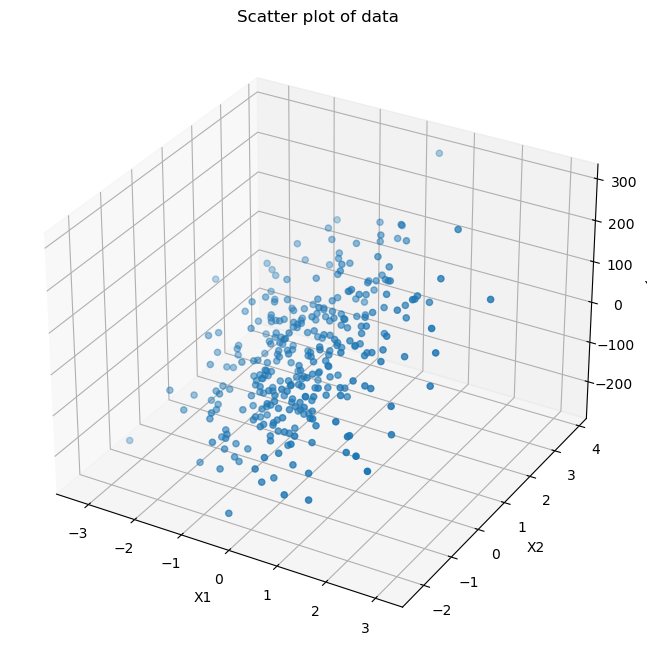

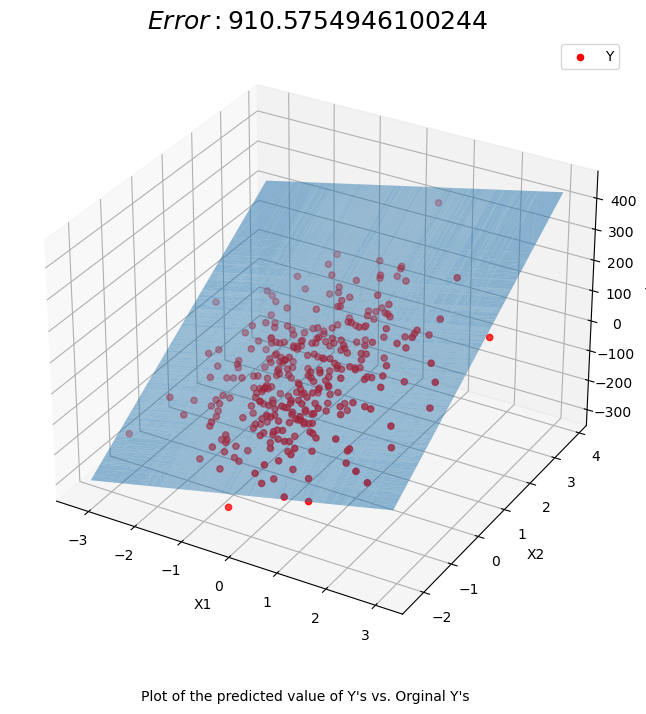

In [6]:

print(reg.weights)

visualize(X_train, y_train, train_predictions, train_mse, reg.weights, reg.bias)